In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('clean_data/train.csv')
y_train = pd.read_csv('clean_data/salesprices.csv')
y_train.columns = ['SalesPrice']

In [3]:
train.shape

(1458, 220)

In [4]:
train.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,2.885846,5.831328,19.212182,0.730463,0.730463,1.540963,0.0,2.440268,1.820334,14.187527,...,0,0,0,1,0,0,0,0,1,0
1,2.055642,6.221214,19.712205,0.730463,0.730463,1.540963,0.0,2.259674,2.440268,14.145138,...,0,0,0,1,0,0,0,0,1,0
2,2.885846,5.914940,20.347241,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.184404,...,0,0,0,1,0,0,0,0,1,0
3,3.011340,5.684507,19.691553,0.730463,0.730463,0.000000,0.0,2.440268,1.820334,14.047529,...,0,0,0,1,1,0,0,0,0,0
4,2.885846,6.314735,21.325160,0.730463,0.730463,0.000000,0.0,2.602594,1.820334,14.182841,...,0,0,0,1,0,0,0,0,1,0


In [5]:
y_train.shape

(1458, 1)

In [6]:
y_train.head()

,SalesPrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220


In [7]:
y_train = y_train.values.ravel()

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train, y_train)

y_train_pred = lr.predict(train)

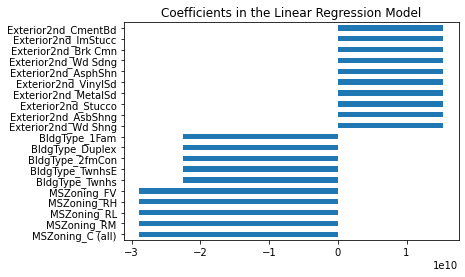

In [9]:
coefs = pd.Series(list(lr.coef_), index=train.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")

plt.title("Coefficients in the Linear Regression Model")
plt.show()

### Lasso Regression

In [10]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 0.0003


In [11]:
print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Try again for more precision with alphas centered around 0.0003
Best alpha : 0.00039


Lasso picked 101 features and eliminated the other 119 features


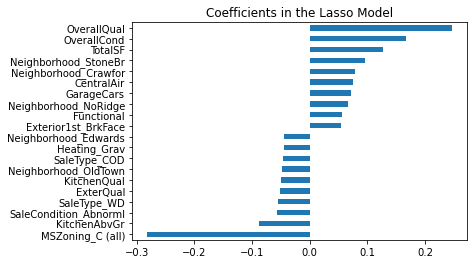

In [12]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

### Decision Tree Regression

In [13]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(train, y_train)

DecisionTreeRegressor(max_depth=3)

''

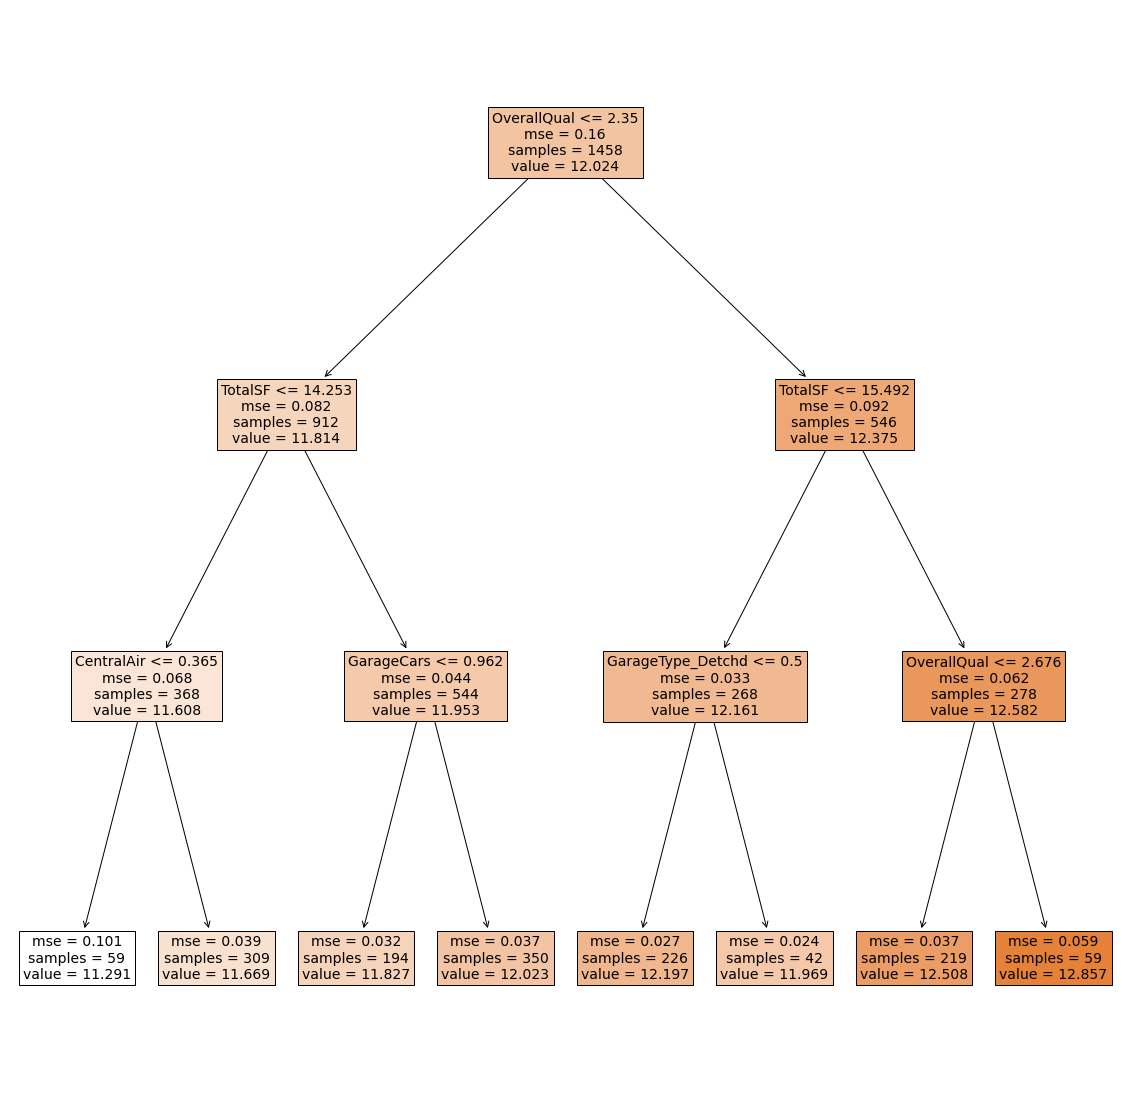

In [14]:
fig = plt.figure(figsize=(20, 20))
plot_tree(dtr, feature_names=train.columns, fontsize=14, filled=True)
''

### Random Forest Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=4, random_state=0)
rfr.fit(train, y_train)

RandomForestRegressor(max_depth=4, random_state=0)

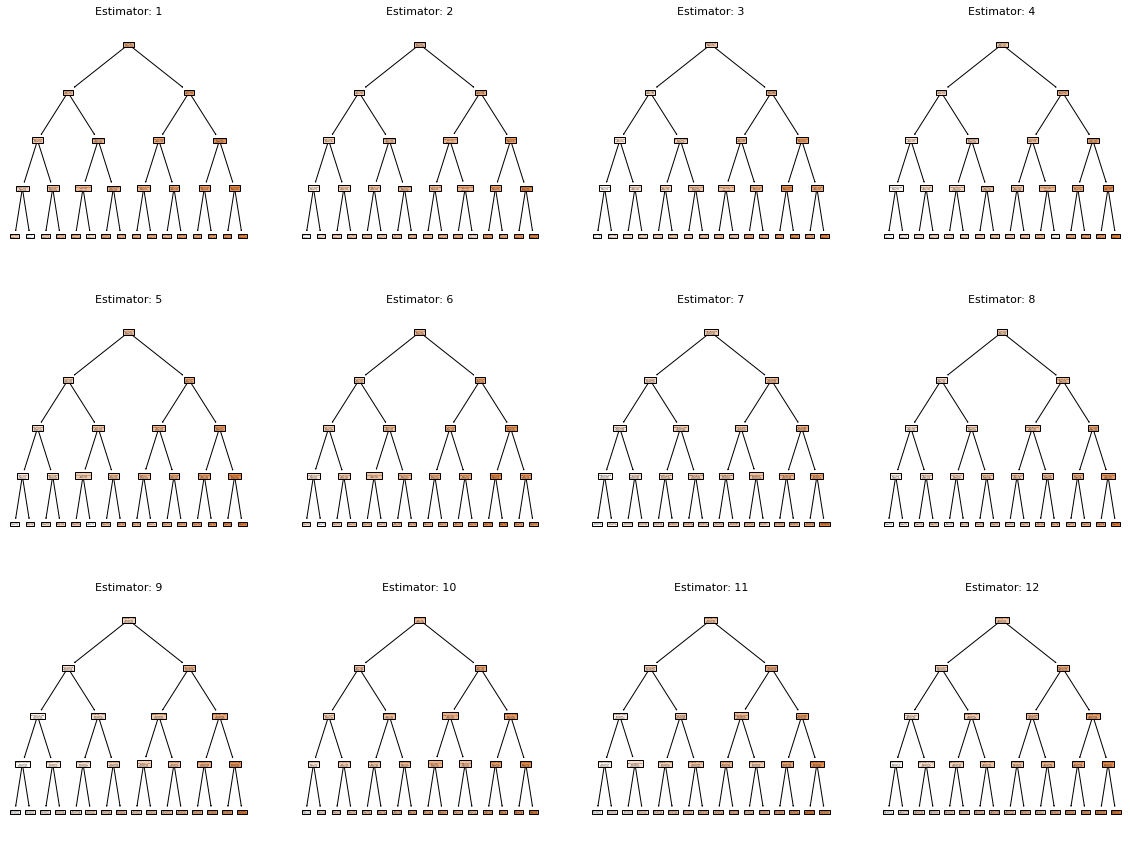

In [24]:
rows = 3
cols = 4

fig, axes = plt.subplots(nrows = rows,ncols = cols,figsize = (cols*5,rows*5))
for index in range(0, rows*cols):
    row = int(index / cols)
    col = index - row*cols
    plot_tree(rfr.estimators_[index],
               feature_names = train.columns, 
               filled = True,
               ax = axes[row, col]);

    axes[row, col].set_title('Estimator: ' + str(index + 1), fontsize = 11)

### k-NN Regression

In [25]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=2)

knn.fit(train, y_train)

NearestNeighbors(n_neighbors=2)